imports

In [1]:
import torch
import os
from tqdm.notebook import tqdm as tqdm
import pandas as pd
import json
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import hashlib

import warnings
warnings.filterwarnings("ignore")
sys.path.insert(1, '../train')
sys.path.insert(1, '../misc')

import config_plots, TrialStatistics
from configParser import getModelName, ConfigParser
import CNN

config_plots.global_settings()

parameters

In [2]:
experimentsPath="/raid/elhamod/Fish/experiments/"
dataPath="/raid/elhamod/Fish"

experiment_list = [
#     {
#        'experimentName': "biology_paper_easy_curated3_50_30",
#        'experimentHash': ['0e4047f9cdcfde1594d90ba13febd488a418c214062a321128c913ef',
#                          'a6ed28549ef4c01a13e6ed3a3f7d71a6f1dfa93a87bbf069614db132']
#     },
    {
       'experimentName': "biology_paper_easy_curated4_Medium",
       'experimentHash': None
    },
    {
       'experimentName': "biology_paper_easy_curated4_Easy_smaller",
       'experimentHash': None
    },
]

figures_subpath = os.path.join('biologypaper_newdataset', 'curated4_MEE_review')

figsize=(24, 10)
ylabel = "accuracy (f1-score)"
xlabel = "model"
xticks = [1]
# xticks = [3]
xticklabels = [""] 


cuda=0

cuda

In [3]:
# set cuda
if torch.cuda.is_available():
    torch.cuda.set_device(cuda)
    print("using cuda", cuda)

using cuda 0


Create aggregate dataframe

In [4]:
full_df = pd.DataFrame()

for entry in experiment_list:
    experimentName = entry["experimentName"]
    experimentHashes = entry["experimentHash"]
    print('--', experimentHashes)

    config_parser = ConfigParser(experimentsPath, dataPath, experimentName)

    df_path = os.path.join(experimentsPath, experimentName, "results", "raw_experiments.csv")
    df = pd.read_csv(df_path)

    paramsIterator = config_parser.getExperiments()  
    number_of_experiments = sum(1 for e in paramsIterator)  

    for experiment_params in config_parser.getExperiments():

        # get data frame
        experimentHash_ = TrialStatistics.getTrialName(experiment_params)
        print(experimentHash_)
        print(df['experimentHash'][0])
        if (experimentHashes is None) or (experimentHash_ in experimentHashes):
            df_rows = df[df['experimentHash'] == experimentHash_]
            full_df = pd.concat([full_df, df_rows])

-- None
e038ec76e27af102775f1c996ec1656c3a1a3da7ee222933c83f3cf8
e038ec76e27af102775f1c996ec1656c3a1a3da7ee222933c83f3cf8
82953d4489fca9af0efa6a8e3a815172a24a6f97969b70ef0902b878
e038ec76e27af102775f1c996ec1656c3a1a3da7ee222933c83f3cf8
a5ebbe208fd77f10b532d2ee86a00700eb5a14624204a1b5a1e2aa1f
e038ec76e27af102775f1c996ec1656c3a1a3da7ee222933c83f3cf8
-- None
3201046b067d7ed6e24aa6db8d0700a4794b8792d0384240bff7b222
3201046b067d7ed6e24aa6db8d0700a4794b8792d0384240bff7b222
-- None
10d1c9c6204cb55451ea735c4bff287131dc626bc643dea08347960c
10d1c9c6204cb55451ea735c4bff287131dc626bc643dea08347960c


Show dataframe

In [5]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
full_df = full_df.replace('/','', regex=True).replace('_','', regex=True)
full_df

,Unnamed: 0,image_path,suffix,img_res,augmented,batchSize,learning_rate,numOfTrials,fc_layers,modelType,lambda,unsupervisedOnTest,tl_model,link_layer,adaptive_smoothing,adaptive_lambda,adaptive_alpha,noSpeciesBackprop,loss,average correct guess prob,macro f1 test fine,macro f1 test coarse,macro f1 validation fine,time,epochs,top-3,top-5,experimentHash,trial,trialHash
0,0,Curated4Medium,curated3050,448,True,64,0.0001,5,1,HGNNadd,0.01,False,ResNet18,avgpool,True,0.01,0.9,False,4.088942,0.548886,0.791798,0.831618,0.785908,10067.837873,43.0,91.908714,93.672200,e038ec76e27af102775f1c996ec1656c3a1a3da7ee2229...,0,7c5553ab57de8ea7c22abee6033c9746c5cd2fa3b2c1ea...
1,1,Curated4Medium,curated3050,448,True,64,0.0001,5,1,HGNNadd,0.01,False,ResNet18,avgpool,True,0.01,0.9,False,4.075023,0.562886,0.805718,0.862167,0.785432,11247.326665,48.0,92.323654,94.294610,e038ec76e27af102775f1c996ec1656c3a1a3da7ee2229...,1,64bb30916efa6ebe01c82214e8c0686711fbafdce47aa7...
2,2,Curated4Medium,curated3050,448,True,64,0.0001,5,1,HGNNadd,0.01,False,ResNet18,avgpool,True,0.01,0.9,False,4.089332,0.548400,0.807645,0.822711,0.774023,9640.570944,41.0,92.323654,94.709540,e038ec76e27af102775f1c996ec1656c3a1a3da7ee2229...,2,df4b302f8ee7c3aa1e6f6b6f32e6ae3c0808ebba771ee1...
3,3,Curated4Medium,curated3050,448,True,64,0.0001,5,1,HGNNadd,0.01,False,ResNet18,avgpool,True,0.01,0.9,False,4.082215,0.555531,0.796460,0.841695,0.777996,7288.963918,31.0,91.597510,93.361000,e038ec76e27af102775f1c996ec1656c3a1a3da7ee2229...,3,40fdfa8fd2c78dafeec40130a327ab068161a27c832943...
4,4,Curated4Medium,curated3050,448,True,64,0.0001,5,1,HGNNadd,0.01,False,ResNet18,avgpool,True,0.01,0.9,False,4.082131,0.555699,0.799215,0.889284,0.784860,13939.373428,60.0,92.116180,94.813280,e038ec76e27af102775f1c996ec1656c3a1a3da7ee2229...,4,75631a44387105fd97f64d9c1d9e6e28d6b5d7085ee418...
5,5,Curated4Medium,curated3050,448,True,64,0.0001,5,1,BB,0.01,False,ResNet18,avgpool,True,0.01,0.9,False,4.080575,0.557324,0.793528,0.428191,0.773666,14007.912337,62.0,91.182570,93.568470,82953d4489fca9af0efa6a8e3a815172a24a6f97969b70...,0,ee13228d7c6eb1b2324bf3902a802a8df89df574c347e2...
6,6,Curated4Medium,curated3050,448,True,64,0.0001,5,1,BB,0.01,False,ResNet18,avgpool,True,0.01,0.9,False,4.082522,0.555336,0.795717,0.664193,0.772231,13577.068654,60.0,92.531120,93.568470,82953d4489fca9af0efa6a8e3a815172a24a6f97969b70...,1,ad2b4f04e479fbc990cfb07b5127bd9c259a93f2f04b60...
7,7,Curated4Medium,curated3050,448,True,64,0.0001,5,1,BB,0.01,False,ResNet18,avgpool,True,0.01,0.9,False,4.097168,0.540539,0.771129,0.508782,0.784039,9538.856757,42.0,90.560165,93.153530,82953d4489fca9af0efa6a8e3a815172a24a6f97969b70...,2,73a5ac62c833bd6dfa45a55f3d5d75e638b15fc6719168...
8,8,Curated4Medium,curated3050,448,True,64,0.0001,5,1,BB,0.01,False,ResNet18,avgpool,True,0.01,0.9,False,4.064231,0.573743,0.815672,0.717875,0.787551,17400.565676,77.0,93.568470,94.605810,82953d4489fca9af0efa6a8e3a815172a24a6f97969b70...,3,496e2a040ab9601815f57f6e09270ff060ca6ef37d68c7...
9,9,Curated4Medium,curated3050,448,True,64,0.0001,5,1,BB,0.01,False,ResNet18,avgpool,True,0.01,0.9,False,4.100450,0.537242,0.782036,0.499086,0.773501,9626.495421,43.0,91.078840,93.361000,82953d4489fca9af0efa6a8e3a815172a24a6f97969b70...,4,b9902a0045dae3c0bbea122214a5d214d5fa1b3d4c8fdb...


dataframe extracts

In [6]:
# Do any necessary renamings

# full_df = full_df[full_df["suffix"] != 'biology_paper_cleaned_100max']
# full_df = full_df.set_index('suffix')
# full_df = full_df.loc[['biology_paper_cleaned_10max', 
#                        'biology_paper_cleaned_15max', 
#                        'biology_paper_cleaned_30max',
#                       'biology_paper_cleaned_50max',
#                       'biology_paper_cleaned_100max',
#                       'biology_paper_cleaned_200max',]]

# full_df['suffix'] = full_df['suffix'].replace(['biology_paper_cleaned_10max'],'biology_paper_cleaned_010max')
# full_df['suffix'] = full_df['suffix'].replace(['biology_paper_cleaned_15max'],'biology_paper_cleaned_015max')
# full_df['suffix'] = full_df['suffix'].replace(['biology_paper_cleaned_30max'],'biology_paper_cleaned_030max')
# full_df['suffix'] = full_df['suffix'].replace(['biology_paper_cleaned_50max'],'biology_paper_cleaned_050max')
# full_df['image_path'] = full_df['image_path'].replace(['Medium'],'Hard')
# full_df['image_path'] = full_df['image_path'].replace(['Curated4/Easy_50'],'Easy/50')
# full_df['image_path'] = full_df['image_path'].replace(['Curated4/Easy_100'],'Easy/100')

In [10]:
# Make any extracts of edits necessary to the dataframe
displays = [
        {
        'df': full_df[(full_df['augmented'] == True) & (full_df['modelType'] == 'HGNNadd') & (full_df['experimentHash'] !='10d1c9c6204cb55451ea735c4bff287131dc626bc643dea08347960c' ) ],
        'columns': ['macro f1 test fine'],
        'bys': ['image_path'],
        'positions': [0.8],
        'color': 'r',
        'legend': "$\mathbf{HGNN}$"
    },
    {
        'df': full_df[(full_df['augmented'] == False) & (full_df['modelType'] == 'HGNNadd')  ],
        'columns': ['macro f1 test fine'],
        'bys': ['image_path'],
        'positions': [1],
        'color': 'b',
        'legend':"$\mathbf{HGNN}$/No augmentation"
    },
    {
        'df': full_df[(full_df['augmented'] == True) & (full_df['modelType'] == 'HGNNadd') & (full_df['experimentHash'] =='10d1c9c6204cb55451ea735c4bff287131dc626bc643dea08347960c' )  ],
        'columns': ['macro f1 test fine'],
        'bys': ['image_path'],
        'positions': [1.2],
        'color': 'g',
        'legend': "$\mathbf{HGNN}$/No transfer learning"
    },

#     {
#         'df': full_df[(full_df['modelType'] == 'BB') & ((full_df['image_path'] == 'Curated4Easy100') | (full_df['image_path'] == 'Curated4Easy50') | (full_df['image_path'] == 'Curated4Medium')) ],
#         'columns': ['macro f1 test fine'],
#         'bys': ['image_path'],
#         'positions': [-0.2, 0.8, 1.8],
#         'color': 'g',
#         'legend': "$\mathbf{Blackbox}$"
#     },
#     {
#         'df': full_df[(full_df['modelType'] == 'HGNNadd') & ((full_df['image_path'] == 'Curated4Easy100') | (full_df['image_path'] == 'Curated4Easy50') | (full_df['image_path'] == 'Curated4Medium')) ],
#         'columns': ['macro f1 test fine'],
#         'bys': ['image_path'],
#         'positions': [0.2, 1.2, 2.2],
#         'color': 'r',
#         'legend': "$\mathbf{HGNN}$"
#     },
#         {
#         'df': full_df[(full_df['modelType'] == 'HGNNadd') & ((full_df['image_path'] == 'Curated4Easy200') | (full_df['image_path'] == 'Curated4Medium')) ],
#         'columns': ['macro f1 test fine'],
#         'bys': ['image_path'],
#         'positions': [0.2, 1.2],
#         'color': 'r',
#         'legend': "$\mathbf{HGNN}$"
#     },
#     {
#         'df': full_df[(full_df['modelType'] == 'DSN')],
#         'columns': ['macro f1 test fine'],
#         'bys': ['suffix','modelType'],
#         'positions': [1],
#         'color':'b',
#         'legend':   "$\mathbf{DSN}$"
#     },
#     {
#         'df': full_df[(full_df['adaptive_smoothing'] == False) & (full_df['modelType'] == 'HGNN_add')],
#         'columns': ['macro f1 test fine'],
#         'bys': ['suffix','modelType'],
#         'positions': [-0.2, 0.8],
#         'color':'b',
#         'legend':   "$\mathbf{HGNN-constant}$"
#     },

]

Prepare and plot

In [11]:
fig,ax = plt.subplots(figsize=figsize)
plt.close()

def plot_boxplot(df, fig, ax, columns, bys, color, positions):
    ax.set_xticks(range(len(df)))
    TrialStatistics.pandasBoxplot(df, columns, bys, ax, color, positions)

In [12]:


# TrialStatistics.pandasBoxplot(full_df, , , dir_, saveFig=True, figsize=(24, 10))
# TrialStatistics.pandasBoxplot(full_df, ['macro f1 test coarse'], ['suffix', 'modelType'], dir_, saveFig=True, figsize=(24, 10))

for display in displays:
    plot_boxplot(display['df'], fig, ax, 
                 display['columns'], display['bys'], display['color'], 
                 display['positions'])

patches=[]
for display in displays:
    patches.append(mpatches.Patch(color=display['color'], label=display['legend']))
ax.legend(handles=patches)

<Figure size 2700x1500 with 0 Axes>

In [13]:

# TrialStatistics.pandasBoxplot(full_df, ['macro f1 test fine'], ['suffix', 'modelType'], dir_, saveFig=True, figsize=(24, 10))
# TrialStatistics.pandasBoxplot(full_df, ['macro f1 test coarse'], ['suffix', 'modelType'], dir_, saveFig=True, figsize=(24, 10))


In [14]:
ax.set_title("")
fig.suptitle("")
ax.set_ylabel(ylabel)
ax.set_xlabel(xlabel)
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)

[Text(0, 0, '')]

In [15]:
name = "boxplot - " +  hashlib.sha224(str([full_df, displays]).encode('utf-8')).hexdigest()

dir_ = os.path.join(experimentsPath, 'figures', figures_subpath)    

if not os.path.exists(dir_):
    os.makedirs(dir_)
fig.savefig(os.path.join(dir_,name+ ".pdf"), bbox_inches='tight')

with open(os.path.join(dir_, 'experiments.json'), 'w') as f:
    json.dump(experiment_list, f)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


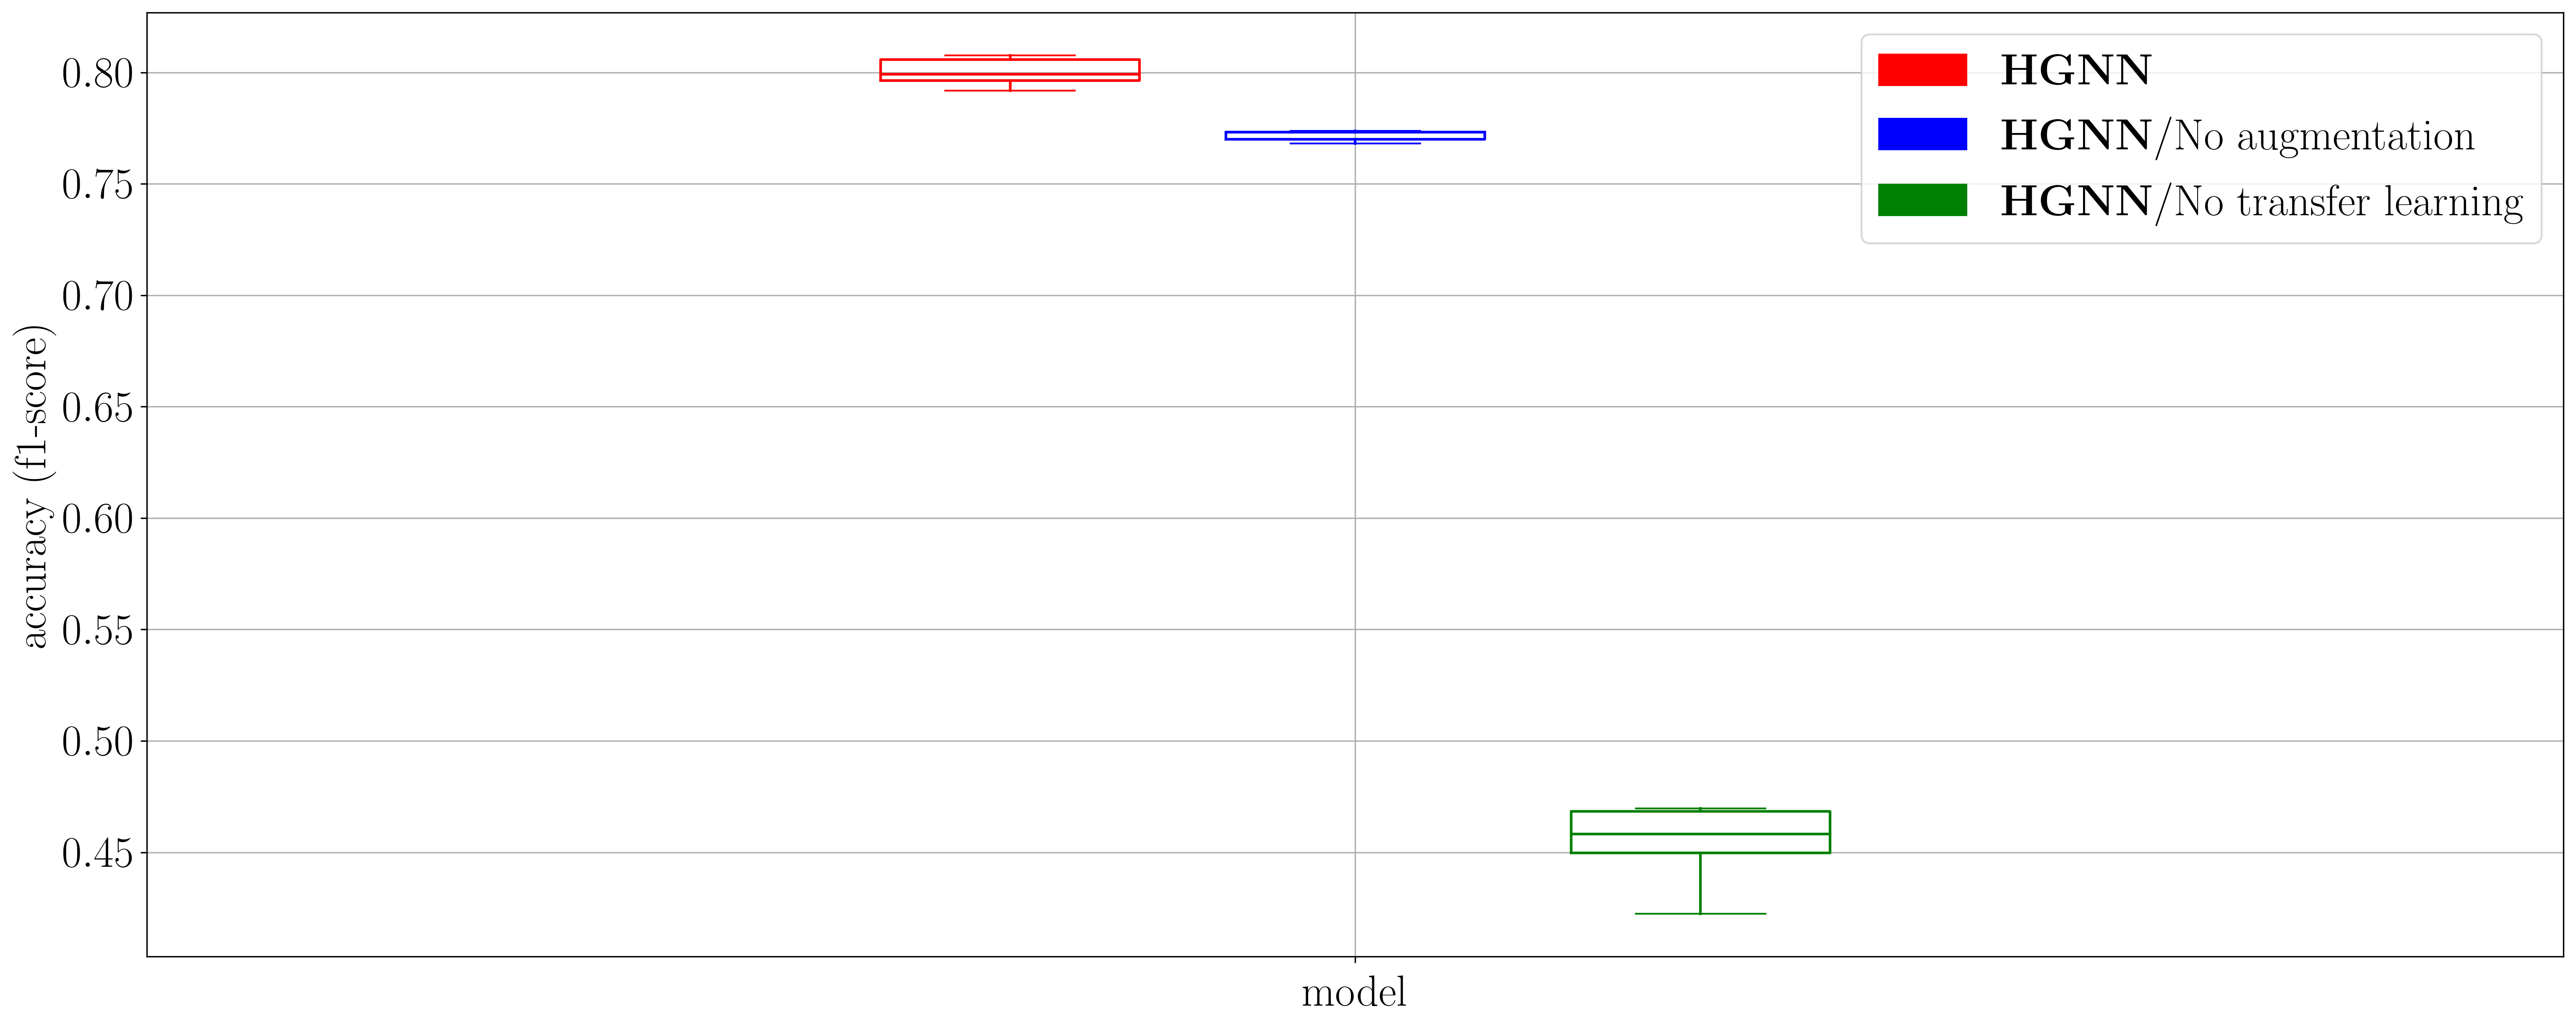

In [16]:
fig